# <font color=green>**REDUCTION DE LA DIMENSION D'UNE ENSEMBLE DE DONNEES PAR L'ANALYSE EN COMPOSANTES PRINCIPALES**

*Auteur : Josué Afouda*


# ***Librairies***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ***ACP dans un Pipeline***

L'ensemble des données de cette partie est un tableau d'échantillons donnant des mesures (le poids en grammes, la longueur en centimètres, le rapport en pourcentage de la hauteur à la longueur, etc.) de 7 espèces de poissons codées de 1 à 7. Chaque ligne représente un poisson individuel. Ces données proviennent de [Journal of Statistics Education](http://jse.amstat.org/jse_data_archive.htm). Consultez la [description](http://jse.amstat.org/datasets/fishcatch.txt) de ces données que vous pouvez télécharger via cette [page](http://jse.amstat.org/datasets/fishcatch.dat.txt).

In [ ]:
# Importation des données

columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height%', 'Width%', 'Sex'] 

fishes = pd.read_csv('http://jse.amstat.org/datasets/fishcatch.dat.txt', delimiter='\s+', header=None, names=columns)

fishes

,Species,Weight,Length1,Length2,Length3,Height%,Width%,Sex
1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN
...,...,...,...,...,...,...,...,...
155,7,1100.0,39.0,42.0,44.6,28.7,15.4,0.0
156,7,1000.0,39.8,43.0,45.2,26.4,16.1,0.0
157,7,1100.0,40.1,43.0,45.5,27.5,16.3,0.0
158,7,1000.0,40.2,43.5,46.0,27.4,17.7,1.0


In [ ]:
# Suppression des colonnes 'Species' et 'Sex'
fishes.drop(columns=['Species', 'Sex'], inplace=True)
fishes.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 159
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   158 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height%  159 non-null    float64
 5   Width%   159 non-null    float64
dtypes: float64(6)
memory usage: 8.7 KB


In [ ]:
# Remplacement de la valeur manquante au niveau de la variable 'Weight'
fishes['Weight'] = fishes['Weight'].fillna(fishes['Weight'].mean(axis=0))

# Vérifions qu'il n'y a plus de données manquantes
fishes.isna().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height%    0
Width%     0
dtype: int64

L'ensemble des données ci-dessus est de 6 dimensions (6 variables). A l'aide de la technique de l'ACP, Réduisez la dimensionnalité de cet ensemble afin de trouver sa dimension intrinsèque.

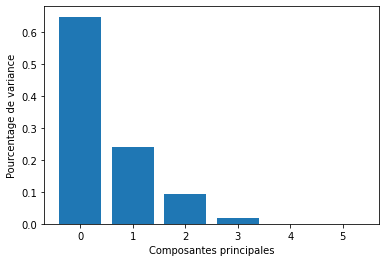

In [ ]:
# Création d'un tableau numpy 2D à partir de la dataframe fishes
fishes_array = fishes.values

# Création d'un objet Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA())])

# Application de l'objet pipe aux données
pipe.fit(fishes_array)

# Visualisation du pourcentage de variance expliquée par chaque composante
plt.bar(range(pipe[1].n_components_), pipe[1].explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance')
plt.xticks(range(pipe[1].n_components_))
plt.show()

In [ ]:
# Cumul du pourcentage de variance expliquée
pipe[1].explained_variance_ratio_.cumsum()


array([0.64945036, 0.89047222, 0.98237637, 0.99955204, 0.99995958,
       1.        ])

Les deux premières composantes expliquent 89% de la variance totale des données. On peut donc dire que la dimension intrinsèque de cet ensemble de données est raisonnablement égale à 2. Transformons donc la dataframe originelle de 6 variables en une dataframe de 2 variables.

In [ ]:
# Création d'un pipeline
pipe2 = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=2))])

# Transformation des données
fishes_transformed = pipe2.fit_transform(fishes_array)
fishes_transformed.shape

(159, 2)

In [ ]:
fishes_array.shape

(159, 6)

In [ ]:
fishes_transformed

array([[-4.80116754e-01, -6.68315517e-01],
       [-2.55219975e-01, -9.13015811e-01],
       [-1.58349536e-01, -1.30447046e+00],
       [ 1.55073466e-01, -5.45322026e-01],
       [ 3.06983365e-01, -9.88607676e-01],
       [ 4.16523550e-01, -9.20230768e-01],
       [ 5.20354586e-01, -1.42775330e+00],
       [ 3.54099424e-01, -4.01105918e-01],
       [ 4.85505153e-01, -8.43555574e-01],
       [ 6.71206851e-01, -7.49157091e-01],
       [ 6.56684573e-01, -8.77178513e-01],
       [ 6.89764492e-01, -6.54721470e-01],
       [ 6.92811404e-01, -8.33548429e-02],
       [ 6.70605048e-01, -5.13291759e-01],
       [ 9.70451144e-01, -8.75775257e-01],
       [ 1.00909985e+00, -1.32601260e+00],
       [ 1.23553003e+00, -7.16523032e-01],
       [ 1.23712299e+00, -6.22806033e-01],
       [ 1.17937124e+00, -6.84392960e-01],
       [ 1.24852616e+00, -8.90892927e-01],
       [ 1.21195321e+00, -7.31085367e-01],
       [ 1.36846324e+00, -8.31165080e-01],
       [ 1.30425387e+00, -5.49441369e-01],
       [ 1.

Le nouveau jeu de données comporte 159 lignes et 2 colonnes. La réduction de dimensionnalité a été parfaitement opérée :)

# ***Sélection des composants principaux selon le pourcentage de variance expliquée***




